In [62]:
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
df1 = pd.read_csv("../data/finance/csv_files/yearly_spy_data.csv")
#df2 = pd.read_csv("../data/finance/csv_files/yearly_xar_data.csv")
df3 = pd.read_csv("../data/finance/csv_files/yearly_xhe_data.csv")

In [64]:
df1['Date'] = pd.to_datetime(df1['Date'])
df1['year'] = df1['Date'].dt.year

In [65]:
df3['Date'] = pd.to_datetime(df3['Date'])
df3['year'] = df3['Date'].dt.year

In [66]:
crime_df = pd.read_csv("../data/crime/estimated_crimes_1979_2022.csv")

In [67]:
crime_df

,year,state_abbr,state_name,population,violent_crime,homicide,rape_legacy,rape_revised,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft,caveats
0,1979,NaN,NaN,220099000,1208030,21460,76390.0,NaN,480700,629480,11041500,3327700,6601000,1112800,NaN
1,1979,AK,Alaska,406000,1994,54,292.0,NaN,445,1203,23193,5616,15076,2501,NaN
2,1979,AL,Alabama,3769000,15578,496,1037.0,NaN,4127,9918,144372,48517,83791,12064,NaN
3,1979,AR,Arkansas,2180000,7984,198,595.0,NaN,1626,5565,70949,21457,45267,4225,NaN
4,1979,AZ,Arizona,2450000,14528,219,1120.0,NaN,4305,8884,177977,48916,116976,12085,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2279,2022,VT,Vermont,647064,1436,22,NaN,238.0,86,1090,10813,984,9224,605,NaN
2280,2022,WA,Washington,7785786,29247,387,NaN,3055.0,6756,19049,261323,43837,167709,49777,NaN
2281,2022,WI,Wisconsin,5892539,17502,314,NaN,2273.0,2323,12592,81611,9059,57805,14747,NaN
2282,2022,WV,West Virginia,1775156,4934,81,NaN,789.0,178,3886,21836,3377,16885,1574,NaN


In [68]:
total_crime_df = crime_df[pd.isna(crime_df['state_abbr'])]

In [69]:
df1_extracted = df1[['year','Close']]
total_crime_extracted = total_crime_df[['year','violent_crime','homicide']]

merged_df_spy = pd.merge(df1_extracted, total_crime_extracted, on='year', how='inner')

In [70]:
df3_extracted = df3[['year','Close']]
total_crime_extracted = total_crime_df[['year','violent_crime','homicide']]

merged_df_xhe = pd.merge(df3_extracted, total_crime_extracted, on='year', how='inner')

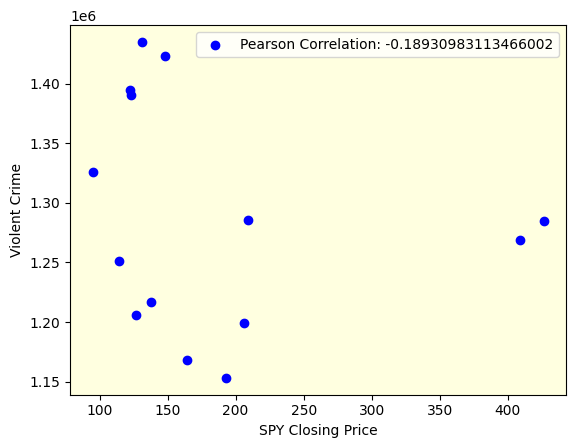

In [71]:
correlation = merged_df_spy['Close'].corr(merged_df_spy['violent_crime'], method='pearson')

plt.scatter(merged_df_spy['Close'], merged_df_spy['violent_crime'], c='b', label=f'Pearson Correlation: {correlation}')
plt.gca().set_facecolor('lightyellow')
plt.xlabel('SPY Closing Price')
plt.ylabel('Violent Crime')
plt.legend(loc='upper right')

# Display the plot
plt.show()


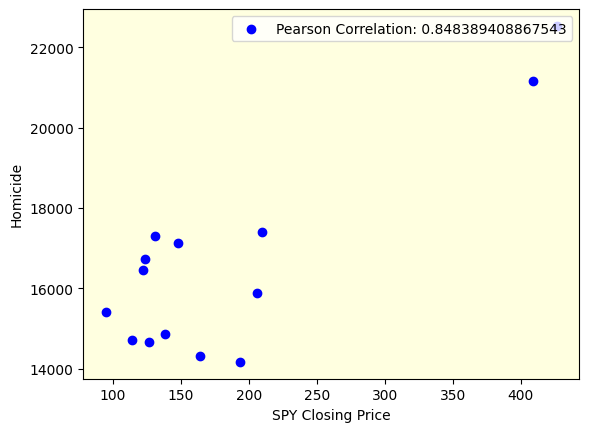

In [72]:
correlation1 = merged_df_spy['Close'].corr(merged_df_spy['homicide'], method='pearson')

plt.scatter(merged_df_spy['Close'], merged_df_spy['homicide'], c='b', label=f'Pearson Correlation: {correlation1}')
plt.gca().set_facecolor('lightyellow')
plt.xlabel('SPY Closing Price')
plt.ylabel('Homicide')
plt.legend(loc='upper right')

# Display the plot
plt.show()

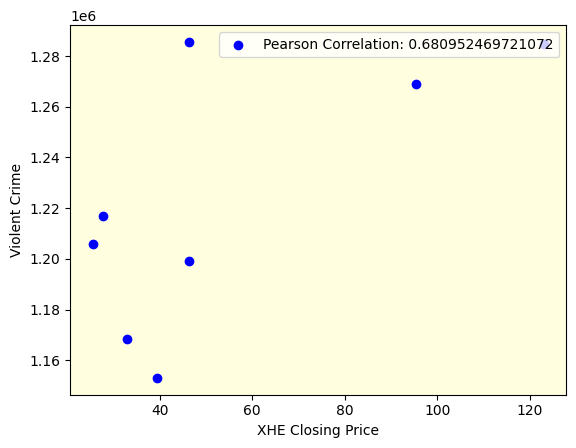

In [73]:
correlation2 = merged_df_xhe['Close'].corr(merged_df_xhe['violent_crime'], method='pearson')

plt.scatter(merged_df_xhe['Close'], merged_df_xhe['violent_crime'], c='b', label=f'Pearson Correlation: {correlation2}')
plt.gca().set_facecolor('lightyellow')
plt.xlabel('XHE Closing Price')
plt.ylabel('Violent Crime')
plt.legend(loc='upper right')

# Display the plot
plt.show()

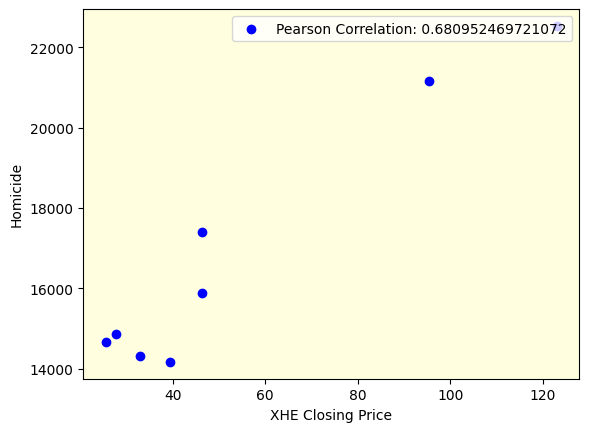

In [74]:
correlation3 = merged_df_xhe['Close'].corr(merged_df_xhe['homicide'], method='pearson')

plt.scatter(merged_df_xhe['Close'], merged_df_xhe['homicide'], c='b', label=f'Pearson Correlation: {correlation2}')
plt.gca().set_facecolor('lightyellow')
plt.xlabel('XHE Closing Price')
plt.ylabel('Homicide')
plt.legend(loc='upper right')

# Display the plot
plt.show()